Kryptoměny
In [ ]:
import requests

r = requests.get("https://raw.githubusercontent.com/pesikj/progr2-python/master/data/crypto_prices.csv")
open("crypto_prices.csv", "wb").write(r.content)
V souboru crypto_prices.csv najdeš ceny různých kryptoměn v průběhu času. Datum je ve sloupci Date a název kryptoměny ti prozradí sloupec Name, alternativně můžeš využít sloupec Symbol.
Použij zavírací cenu kryptoměny (sloupec Close) a vypočti procentuální změnu jednotlivých kryptoměn. Pozor na to, ať se ti nepočítají ceny mezi jednotlivými měnami. Ošetřit to můžeš pomocí metody groupby(), jako jsme to dělali např. u metody shift().

Vytvoř korelační matici změn cen jednotlivých kryptoměn a zobraz je jako tabulku.

V tabulce vyber dvojici kryptoměn s vysokou hodnotou koeficientu korelace a jinou dvojici s koeficientem korelace blízko 0. Změny cen pro dvojice měn, které jsou hodně a naopak málo korelované, si zobraz jako bodový graf.
Takto nějak by měla vypadat korelační matice, ke které dojdeš.

In [1]:
import requests

r = requests.get("https://raw.githubusercontent.com/pesikj/progr2-python/master/data/crypto_prices.csv")
open("crypto_prices.csv", "wb").write(r.content)

5312466

In [2]:
import pandas as pd
import statistics
from scipy import stats
from scipy.stats import gmean
import seaborn

In [3]:
crypto_prices = pd.read_csv('crypto_prices.csv')


In [4]:
crypto_prices = pd.DataFrame(data = crypto_prices)

In [5]:
crypto_prices = crypto_prices.sort_values(['Date'])

In [6]:
 crypto_prices['Change'] = crypto_prices.groupby(['Name'])['Close'].pct_change()


<AxesSubplot:>

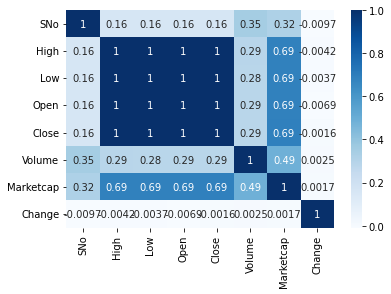

In [7]:
seaborn.heatmap(crypto_prices.corr(),annot= True, cmap="Blues")

In [8]:
crypto_prices_for_corr = crypto_prices[['Name','Change']]
crypto_prices_for_corr = crypto_prices_for_corr.dropna(subset = ['Change'], inplace = False)
crypto_prices_for_corr

,Name,Change
17118,Litecoin,-0.019939
1718,Bitcoin,-0.038328
17119,Litecoin,-0.115322
1719,Bitcoin,-0.158345
17120,Litecoin,-0.112873
...,...,...
6081,Cardano,0.009363
4707,Bitcoin,0.014496
1716,Binance Coin,0.061370
33008,USD Coin,-0.000469


In [9]:
crypto_growth = []
for value in crypto_prices_for_corr['Change']:
  crypto_growth.append(1 + value/100)

print((statistics.geometric_mean(crypto_growth) - 1) * 100)


0.004541740695307439
